## Retrieving the Best Forecast from THREDDS

In [1]:
import xarray as xr

regridded_url = 'http://tds.ioos.us/thredds/dodsC/ioos/ofs/dbofs/forecast/regulargrid/DBOFS_Forecast_Regulargrid_best.ncd'
standard_url = 'http://tds.ioos.us/thredds/dodsC/ioos/ofs/dbofs/forecast/fields/DBOFS_Forecast_Fields_best.ncd'

ds = xr.open_dataset(standard_url)
print(str(ds.time.min()))
print(str(ds.time.max()))
ds

<xarray.DataArray 'time' ()>
array('2023-08-26T21:00:00.000000000', dtype='datetime64[ns]')
<xarray.DataArray 'time' ()>
array('2023-09-29T12:00:00.000000000', dtype='datetime64[ns]')


<xarray.Dataset>
Dimensions:        (s_rho: 10, s_w: 11, eta_rho: 732, xi_rho: 119, eta_u: 732,
                    xi_u: 118, eta_v: 731, xi_v: 119, eta_psi: 731,
                    xi_psi: 118, time: 805, tracer: 2, boundary: 4)
Coordinates:
  * s_rho          (s_rho) float64 -0.95 -0.85 -0.75 -0.65 ... -0.25 -0.15 -0.05
  * s_w            (s_w) float64 -1.0 -0.9 -0.8 -0.7 -0.6 ... -0.3 -0.2 -0.1 0.0
    lon_rho        (eta_rho, xi_rho) float64 ...
    lat_rho        (eta_rho, xi_rho) float64 ...
    lon_u          (eta_u, xi_u) float64 ...
    lat_u          (eta_u, xi_u) float64 ...
    lon_v          (eta_v, xi_v) float64 ...
    lat_v          (eta_v, xi_v) float64 ...
    lon_psi        (eta_psi, xi_psi) float64 ...
    lat_psi        (eta_psi, xi_psi) float64 ...
  * time           (time) datetime64[ns] 2023-08-26T21:00:00 ... 2023-09-29T1...
    time_run       (time) datetime64[ns] ...
Dimensions without coordinates: eta_rho, xi_rho, eta_u, xi_u, eta_v, xi_v,
                                eta_psi, xi_psi, tracer, boundary
Data variables: (12/79)
    time_offset    (time) datetime64[ns] ...
    ntimes         int32 ...
    ndtfast        int32 ...
    dt             float64 ...
    dtfast         float64 ...
    nHIS           int32 ...
    ...             ...
    w              (time, s_w, eta_rho, xi_rho) float32 ...
    temp           (time, s_rho, eta_rho, xi_rho) float32 ...
    salt           (time, s_rho, eta_rho, xi_rho) float32 ...
    Pair           (time, eta_rho, xi_rho) float32 ...
    Uwind          (time, eta_rho, xi_rho) float32 ...
    Vwind          (time, eta_rho, xi_rho) float32 ...
Attributes: (12/85)
    file:                         nos.dbofs.fields.forecast.20230926.t12z_004...
    format:                       netCDF-4/HDF5 file
    Conventions:                  CF-1.7, ACDD-1.3, IOOS-1.2
    type:                         ROMS/TOMS history file
    title:                        Delaware Bay Operational Forecast System (D...
    var_info:                     varinfo.yaml
    ...                           ...
    contributor_url:              rpsgroup.com
    keywords:                     Oceans > Ocean Circulation > Ocean Currents...
    source:                       ROMS
    platform:                     Models/Analyses > > Operational Models
    processing_level:             forecast_model
    EXTRA_DIMENSION.N:            10

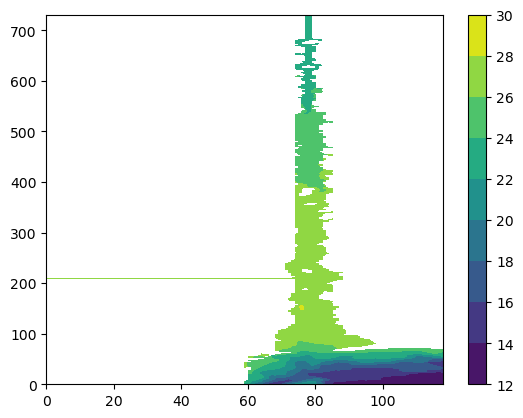

In [2]:
import matplotlib.pyplot as plt

plt.contourf(ds['temp'][0,0,:])
plt.colorbar()

The default Matplotlib rendering won't work correctly unless we do a transformation of the data.

Here we can use Datashader to render the mesh correctly.

In [3]:
import datashader as dsh
import datashader.transfer_functions as tf

def shade(variable):
    cvs = dsh.Canvas(plot_width=800, plot_height=600)
    return tf.shade(cvs.quadmesh(variable, x='lon_rho', y='lat_rho'))

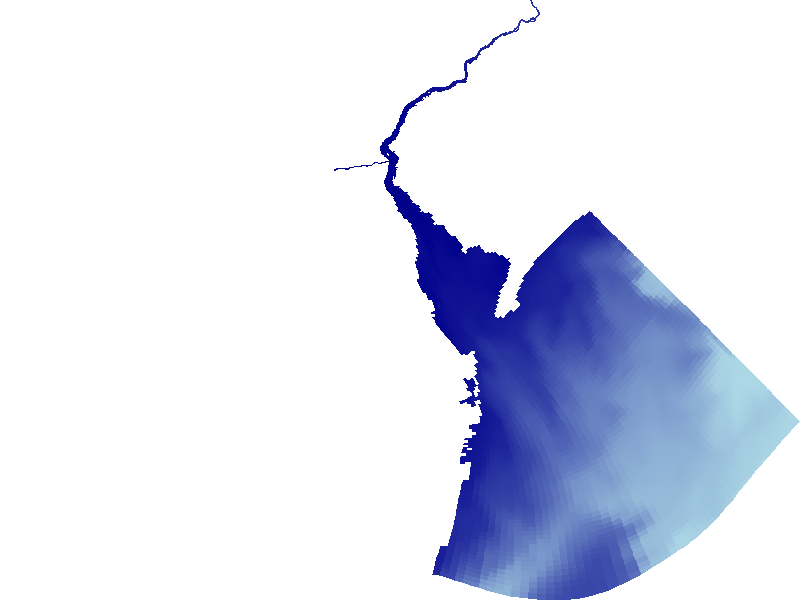

In [4]:
sst = ds.temp.isel(time=0, s_rho=0)
shade(sst)

## Best Forecast Kerchunk

We are virtually aggregating the DBOFS data in the zarr file: `s3://nextgen-dmac/nos/nos.dbofs.fields.best.nc.zarr`

You need to have the correct file format library loaded in your local Python environment. (GRIB, NETCDF, etc)

In [5]:
import xarray as xr
import fsspec

url = 's3://nextgen-dmac/nos/nos.dbofs.fields.best.nc.zarr'

fs = fsspec.filesystem("reference", fo=url, 
                       remote_protocol='s3', target_options={'anon':True, 'use_ssl': False}, remote_options={'anon':True, 'use_ssl': False}, anon=True)
m = fs.get_mapper("") 

ds = xr.open_dataset(m, engine="zarr", backend_kwargs=dict(consolidated=False))
print(str(ds.ocean_time.min()))
print(str(ds.ocean_time.max()))
ds

<xarray.DataArray 'ocean_time' ()>
array('2023-08-21T01:00:00.000000000', dtype='datetime64[ns]')
<xarray.DataArray 'ocean_time' ()>
array('2023-09-24T18:00:00.000000000', dtype='datetime64[ns]')


<xarray.Dataset>
Dimensions:        (ocean_time: 812, tracer: 2, s_rho: 10, s_w: 11,
                    boundary: 4, eta_rho: 732, xi_rho: 119, eta_psi: 731,
                    xi_psi: 118, eta_u: 732, xi_u: 118, eta_v: 731, xi_v: 119)
Coordinates:
    lat_psi        (eta_psi, xi_psi) float64 ...
    lat_rho        (eta_rho, xi_rho) float64 ...
    lat_u          (eta_u, xi_u) float64 ...
    lat_v          (eta_v, xi_v) float64 ...
    lon_psi        (eta_psi, xi_psi) float64 ...
    lon_rho        (eta_rho, xi_rho) float64 ...
    lon_u          (eta_u, xi_u) float64 ...
    lon_v          (eta_v, xi_v) float64 ...
  * ocean_time     (ocean_time) datetime64[ns] 2023-08-21T01:00:00 ... 2023-0...
  * s_rho          (s_rho) float64 -0.95 -0.85 -0.75 -0.65 ... -0.25 -0.15 -0.05
  * s_w            (s_w) float64 -1.0 -0.9 -0.8 -0.7 -0.6 ... -0.3 -0.2 -0.1 0.0
Dimensions without coordinates: tracer, boundary, eta_rho, xi_rho, eta_psi,
                                xi_psi, eta_u, xi_u, eta_v, xi_v
Data variables: (12/79)
    Akk_bak        (ocean_time) float64 ...
    Akp_bak        (ocean_time) float64 ...
    Akt_bak        (ocean_time, tracer) float64 ...
    Akv_bak        (ocean_time) float64 ...
    Cs_r           (ocean_time, s_rho) float64 ...
    Cs_w           (ocean_time, s_w) float64 ...
    ...             ...
    theta_s        (ocean_time) float64 ...
    u              (ocean_time, s_rho, eta_u, xi_u) float32 ...
    v              (ocean_time, s_rho, eta_v, xi_v) float32 ...
    w              (ocean_time, s_w, eta_rho, xi_rho) float32 ...
    xl             (ocean_time) float64 ...
    zeta           (ocean_time, eta_rho, xi_rho) float32 ...
Attributes: (12/33)
    CPP_options:       mode, ADD_FSOBC, ADD_M2OBC, ANA_BSFLUX, ANA_BTFLUX, AN...
    Conventions:       CF-1.4, SGRID-0.3
    NLM_LBC:           \nEDGE:  WEST   SOUTH  EAST   NORTH  \nzeta:  Cha    C...
    NLM_TADV:          \nADVECTION:   HORIZONTAL   VERTICAL     \ntemp:      ...
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_ra...
    bry_file_01:       nos.dbofs.obc.20230821.t00z.nc
    ...                ...
    svn_url:           
    tide_file:         nos.dbofs.roms.tides.nc
    tiling:            008x016
    title:             dbofs forecast RUN in operational mode
    type:              ROMS/TOMS history file
    var_info:          varinfo.yaml

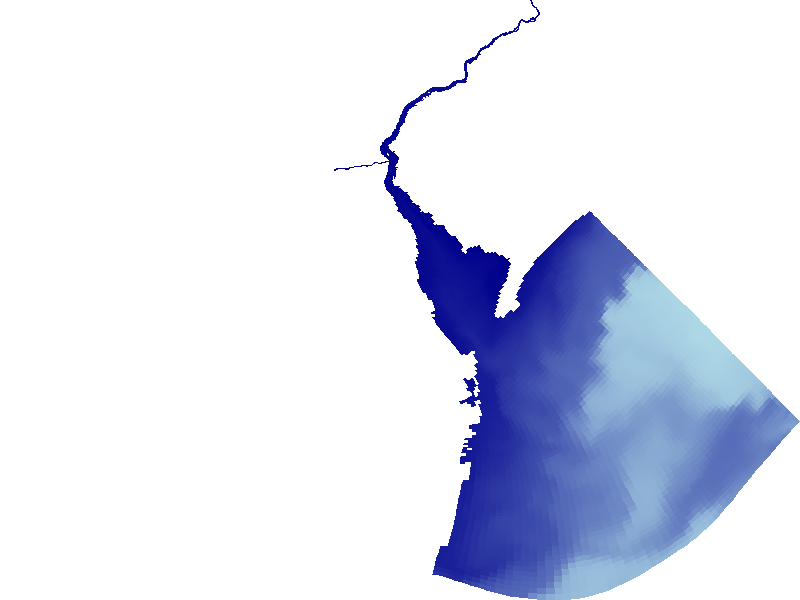

In [13]:
sst = ds.temp.isel(ocean_time=1, s_rho=0)
shade(sst)

The dataset can be accessed directly with xarray using kerchunk's HTTPFileSystem. This creates a virtual filesystem that maps the zarr chunks and metadata to HTTP endpoints running on XREDS.

This allows us to facade where the data is stored from how it's accessed which allows more flexibility for data storage options.

The dependencies such as NetCDF4 and cfgrib are no longer needed because the data reading occurs on the server.

In [6]:
import xarray as xr
from fsspec.implementations.http import HTTPFileSystem

# We can access our API using fsspec's HTTPFileSystem
fs = HTTPFileSystem()

# The http mapper gives us a dict-like interface to the API
http_map = fs.get_mapper("http://nextgen-dev.ioos.us/xreds/datasets/dbofs/zarr")

ds = xr.open_zarr(http_map, consolidated=True)
print(str(ds.ocean_time.min()))
print(str(ds.ocean_time.max()))
ds

<xarray.DataArray 'ocean_time' ()>
array('2023-09-20T19:00:00.000000000', dtype='datetime64[ns]')
<xarray.DataArray 'ocean_time' ()>
array('2023-09-28T12:00:00.000000000', dtype='datetime64[ns]')


<xarray.Dataset>
Dimensions:        (ocean_time: 186, tracer: 2, s_rho: 10, s_w: 11,
                    boundary: 4, eta_rho: 732, xi_rho: 119, eta_psi: 731,
                    xi_psi: 118, eta_u: 732, xi_u: 118, eta_v: 731, xi_v: 119)
Coordinates:
    lat_psi        (eta_psi, xi_psi) float64 dask.array<chunksize=(731, 118), meta=np.ndarray>
    lat_rho        (eta_rho, xi_rho) float64 dask.array<chunksize=(732, 119), meta=np.ndarray>
    lat_u          (eta_u, xi_u) float64 dask.array<chunksize=(732, 118), meta=np.ndarray>
    lat_v          (eta_v, xi_v) float64 dask.array<chunksize=(731, 119), meta=np.ndarray>
    lon_psi        (eta_psi, xi_psi) float64 dask.array<chunksize=(731, 118), meta=np.ndarray>
    lon_rho        (eta_rho, xi_rho) float64 dask.array<chunksize=(732, 119), meta=np.ndarray>
    lon_u          (eta_u, xi_u) float64 dask.array<chunksize=(732, 118), meta=np.ndarray>
    lon_v          (eta_v, xi_v) float64 dask.array<chunksize=(731, 119), meta=np.ndarray>
  * ocean_time     (ocean_time) datetime64[ns] 2023-09-20T19:00:00 ... 2023-0...
  * s_rho          (s_rho) float64 -0.95 -0.85 -0.75 -0.65 ... -0.25 -0.15 -0.05
  * s_w            (s_w) float64 -1.0 -0.9 -0.8 -0.7 -0.6 ... -0.3 -0.2 -0.1 0.0
Dimensions without coordinates: tracer, boundary, eta_rho, xi_rho, eta_psi,
                                xi_psi, eta_u, xi_u, eta_v, xi_v
Data variables: (12/78)
    Akk_bak        (ocean_time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    Akp_bak        (ocean_time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    Akt_bak        (ocean_time, tracer) float64 dask.array<chunksize=(1, 2), meta=np.ndarray>
    Akv_bak        (ocean_time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    Cs_r           (ocean_time, s_rho) float64 dask.array<chunksize=(1, 10), meta=np.ndarray>
    Cs_w           (ocean_time, s_w) float64 dask.array<chunksize=(1, 11), meta=np.ndarray>
    ...             ...
    theta_s        (ocean_time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    u              (ocean_time, s_rho, eta_u, xi_u) float32 dask.array<chunksize=(1, 10, 732, 118), meta=np.ndarray>
    v              (ocean_time, s_rho, eta_v, xi_v) float32 dask.array<chunksize=(1, 10, 731, 119), meta=np.ndarray>
    w              (ocean_time, s_w, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 6, 732, 119), meta=np.ndarray>
    xl             (ocean_time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    zeta           (ocean_time, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 732, 119), meta=np.ndarray>
Attributes: (12/33)
    CPP_options:       mode, ADD_FSOBC, ADD_M2OBC, ANA_BSFLUX, ANA_BTFLUX, AN...
    Conventions:       CF-1.4, SGRID-0.3
    NLM_LBC:           \nEDGE:  WEST   SOUTH  EAST   NORTH  \nzeta:  Cha    C...
    NLM_TADV:          \nADVECTION:   HORIZONTAL   VERTICAL     \ntemp:      ...
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_ra...
    bry_file_01:       nos.dbofs.obc.20230920.t18z.nc
    ...                ...
    svn_url:           
    tide_file:         nos.dbofs.roms.tides.nc
    tiling:            008x016
    title:             dbofs forecast RUN in operational mode
    type:              ROMS/TOMS history file
    var_info:          varinfo.yaml

We can plot the data in its native grid structure using datashader. 

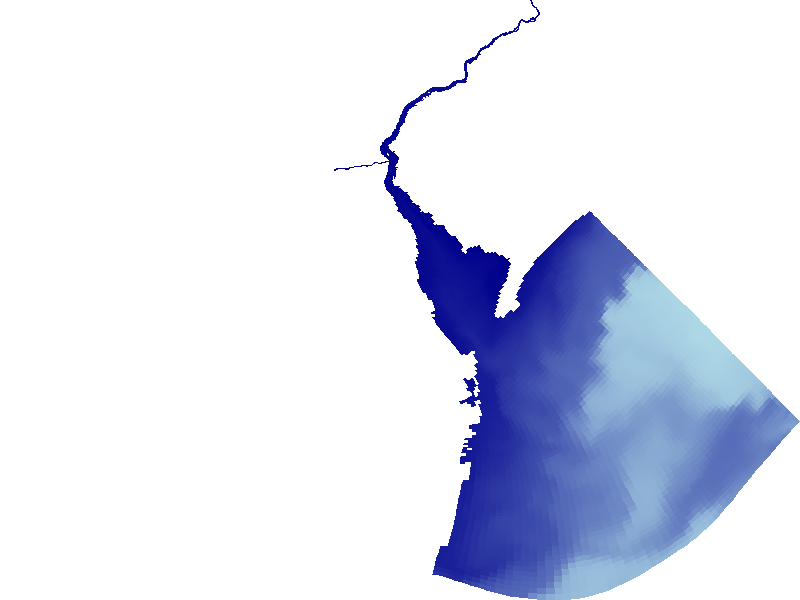

In [17]:
sst = ds.temp.isel(ocean_time=1, s_rho=0)
shade(sst)